# Survival Analysis Example

## Survival analysis is a statistical tool to analyze time to event data. 

The survival analysis method models the probability of an event occurring as a function of time (or additive measure). This can be used to estimate the mean time to an event or the impact of several variables on the likelihood of an event occuring. 
Survival analysis is a valuable tool for understanding and predicting the time to an event of interest, and can provide valuable insights for making informed decisions in a variety of fields.


Survival Function: 
There are two categories of survival functions: parametric survival functions and non-parametric survival functions. This differentiation is based on parameters which can be mean, standard deviation, median, etc.

Parametric statistics are based on assumptions about the distribution of population from which the sample was taken. Nonparametric statistics are not based on assumptions, that is, the data can be collected from a sample that does not follow a specific distribution. (https://www.ibm.com/docs/en/db2woc?topic=procedures-statistics-parametric-nonparametric) 

Parametric survival functions include: exponential survival function, weibull survival function. Non parametric survival functions include the Kaplan-Meier estimate.

Example of Kaplan-Meier estimate:

In [2]:
# Importing modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading the dataset
df = pd.read_csv('churn.csv')  
df.head(2)

,product_data_storage,product_travel_expense,product_payroll,product_accounting,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,company_size,us_region,months_active,churned
0,2048,Free-Trial,Active,No,9,4,0,14,1,8.3,Oct-50,West North Central,3,1
1,2048,Free-Trial,Free-Trial,Active,9,4,2,12,1,0.0,100-250,South Atlantic,2,1


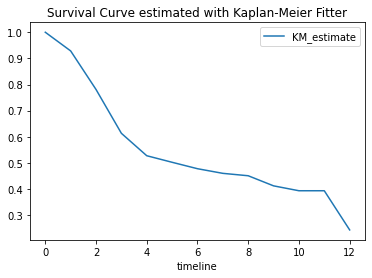

In [5]:
from lifelines import KaplanMeierFitter

# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df.months_active, event_observed=df.churned)

# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

In [6]:
# Print survival probabilities at each month
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.928498
2.0,0.781009
3.0,0.613254
4.0,0.527479
5.0,0.502361
6.0,0.477789
7.0,0.460043
8.0,0.450842


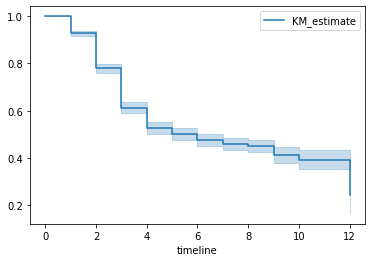

In [7]:
# Plot the survival function with confidence intervals
kmf.plot_survival_function()
plt.show()

# Cox Proportional-Hazards Model

In [13]:
columns_selected = ['csat_score', 'articles_viewed',
       'smartphone_notifications_viewed', 'marketing_emails_clicked',
       'social_media_ads_viewed', 'minutes_customer_support',
        'months_active', 'churned']
df2 = df[columns_selected]

In [14]:
from lifelines import CoxPHFitter
# Initialize and fit the model
coxph = CoxPHFitter()
coxph.fit(df2, duration_col='months_active', event_col='churned')
# Print model summary
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 2000 total observations, 1068 right-censored observations>
             duration col = 'months_active'
                event col = 'churned'
      baseline estimation = breslow
   number of observations = 2000
number of events observed = 932
   partial log-likelihood = -6259.67
         time fit was run = 2022-12-21 03:55:56 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
csat_score                       -0.70       0.49       0.03            -0.76            -0.65                 0.47                 0.52
articles_viewed                  -0.04       0.96       0.02            -0.07            -0.01                 0.93                 0.99
smartphone_notifications_viewed   0.31       1.36       0.05             0.21             0.40                 1.23                 1.50
marketing_emails_clicked         -0.03       0.97       0.01            -0.05            -0.01                 0.95                 0.99
social_media_ads_viewed          -0.25       0.78       0.06            -0.37            -0.12                 0.69                 0.88
minutes_customer_support          0.04       1.05       0.00             0.04             0.05                 1.04                 1.05

                                  cmp to      z      p   -log2(p)
covariate                                                        
csat_score                          0.00 -24.14 <0.005     425.31
articles_viewed                     0.00  -2.30   0.02       5.54
smartphone_notifications_viewed     0.00   6.13 <0.005      30.07
marketing_emails_clicked            0.00  -2.82 <0.005       7.72
social_media_ads_viewed             0.00  -3.87 <0.005      13.16
minutes_customer_support            0.00  12.82 <0.005     122.62
---
Concordance = 0.77
Partial AIC = 12531.34
log-likelihood ratio test = 673.92 on 6 df
-log2(p) of ll-ratio test = 470.33

<AxesSubplot: xlabel='log(HR) (95% CI)'>

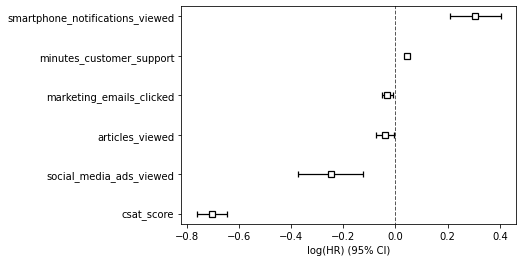

In [15]:
# Plot factor effects 
coxph.plot()